matplotlib is generally considered to be the simplest way to create visualizations in Python, and it has formed the basis for many other plotting libraries like seaborn. However, there’s an argument to be made that creating simple, quick, and elegant plots for analysis is better done with pandas, the popular data manipulation library.


#### There are many advantages to plotting directly from pandas:
* It’s just faster — fewer lines of code, less code that needs to be written, fewer libraries that need to be re-loaded. Visualization is essential to data analysis, so there is no reason why one shouldn’t actively try to make the process of producing a good one faster. Plus, pandas does a lot of inference in what we want it to plot, so it can visualize what we want it to in many cases without explicitly declaring them.

* It’s easier to directly incorporate many of pandas’ handy data manipulation functions involving Series and DataFrames, like differencing and rolling means.

* It’s actually easier to create plots directly from pandas. Converting between bar charts, stacked bar charts, and horizontal bar charts is just a matter of changing a parameter value. Creating subplots and manipulating them is also just a few characters away. Pandas carries much of the hard work in visualizing.


And for the technical: yes, pandas’ plotting runs on matplotlib infrastructure, and loading other matplotlib items or parameters on top of a pandas-created graph can improve it. Instead, pandas simply provides a convenient and more direct interface to connect the data to the visualization.

Consider, for instance, the following DataFrame randomly generated with four columns and ten rows.

In [20]:
import pandas as pd
import numpy as np

In [21]:
data = pd.DataFrame(np.random.rand(10, 4), columns = ['A', 'B', 'C', 'D'])

In [22]:
data

,A,B,C,D
0,0.016706,0.414668,0.423086,0.453469
1,0.849239,0.454248,0.575141,0.120852
2,0.766762,0.071693,0.742277,0.839348
3,0.180724,0.183987,0.281912,0.525331
4,0.405147,0.553712,0.112013,0.561010
5,0.887541,0.194766,0.615726,0.245958
6,0.540961,0.328471,0.129317,0.230728
7,0.200218,0.492766,0.674586,0.392656
8,0.130776,0.604211,0.892116,0.355211
9,0.761759,0.268980,0.216138,0.389955


In [23]:
data.head()

,A,B,C,D
0,0.016706,0.414668,0.423086,0.453469
1,0.849239,0.454248,0.575141,0.120852
2,0.766762,0.071693,0.742277,0.839348
3,0.180724,0.183987,0.281912,0.525331
4,0.405147,0.553712,0.112013,0.561010


One can simply plot out the values for each of these columns per row simply with data.plot.bar();, where data should be replaced with the name of the DataFrame. Note that adding the semicolon (;) after the statement removes the cell from outputting other prints (that is, something like <matplotlib.axes._subplots.AxesSubplot at 0x7f455982a490>).


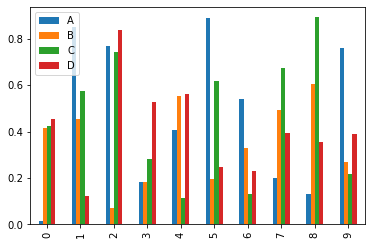

In [26]:
data.plot.bar();

Alternatively, try adding a parameter stacked=True — this is a very easy way to create a stacked bar chart straight from the data source.

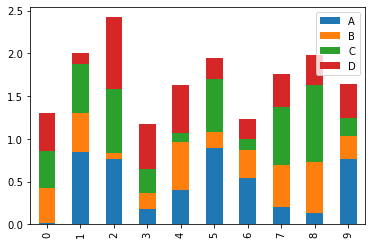

In [31]:
data.plot.bar(stacked = True);

Or, try using barh, which draws horizontal bars: **data.plot.barh(stacked=True)**. All these variants can be easily created with only one line of code because they establish a direct flow with the data.

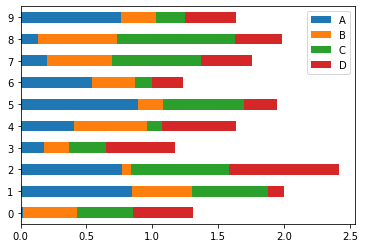

In [32]:
data.plot.barh(stacked = True);

If you choose to, you could change the general palette of the plot by adding **sns.set_palette(‘magma’)** before the code for the plot. Alternatively, you could pass in a color map argument into the plot.

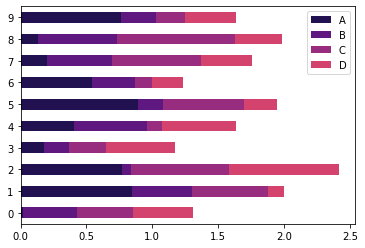

In [35]:
import seaborn as sns
sns.set_palette('magma')

data.plot.barh(stacked = True);

Another method of displaying this type of data would be an area chart, using **data.plot.area();**.

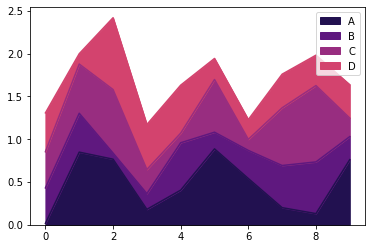

In [39]:
data.plot.area();

Parameters within the code can be adjusted as they would normally would with a matplotlib or seaborn model. In the case of **data.plot.area(stacked=False)**;, the parameter *alpha (transparency)* is set to 0.5 by default, but can be manually adjusted.

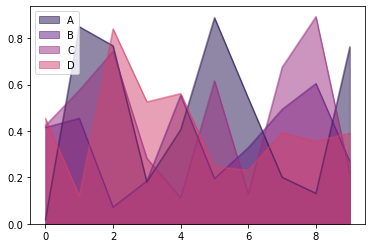

In [60]:
data.plot.area(stacked = False);

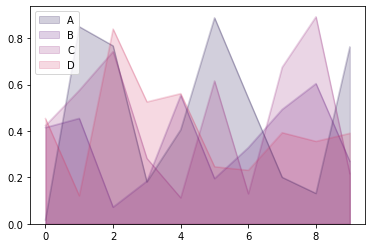

In [68]:
data.plot.area(stacked = False, alpha = 0.2);

One of the major benefits of using pandas directly is that many of pandas’ helpful DataFrame manipulations can be directly used. For example, consider the result of **data.diff()**, which simply takes the difference between one row and the row before it (hence the presence of NaN in the first row). ***This is helpful in many time series applications.***

In [69]:
data.diff()

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,0.832533,0.039579,0.152054,-0.332617
2,-0.082477,-0.382555,0.167136,0.718496
3,-0.586038,0.112294,-0.460365,-0.314017
4,0.224422,0.369725,-0.169899,0.035679
5,0.482394,-0.358946,0.503713,-0.315052
6,-0.346580,0.133705,-0.486409,-0.015229
7,-0.340743,0.164295,0.545269,0.161927
8,-0.069441,0.111445,0.217531,-0.037445
9,0.630983,-0.335231,-0.675979,0.034744


For example, consider the following code, which plots out the differenced data, as well as demonstrating the usage of various parameters in pandas plotting, in this case, color:

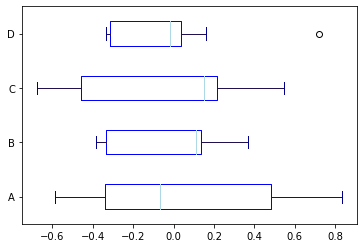

In [72]:
data.diff().plot.box(vert = False, color = {'medians': 'lightblue', 'boxes': 'blue', 'caps': 'darkblue'});

Another application of pandas’ handy data manipulation functions is with **.rolling().mean()**, which takes the average rolling mean, a common statistical method to reduce the noisiness of data that averages moving windows of data.

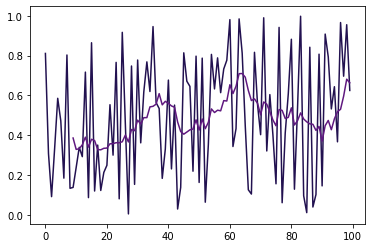

In [76]:
data = pd.DataFrame(np.random.rand(100, 1), columns = ['value']).reset_index()
data['value'].plot();
data['value'].rolling(10).mean().plot();

#### There are various other types of plots that can be created directly from the data:

* kde or density for density plots
* scatter for scatter plots
* hexbin for hexagonal bin plots

In [91]:
data = pd.DataFrame(np.random.rand(10, 4), columns = ['A', 'B', 'C', 'D'])

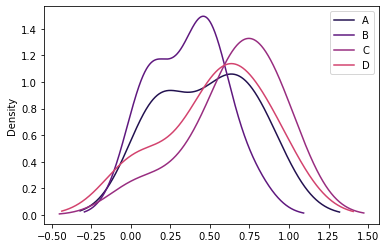

In [92]:
data.plot.kde(); # Distribution Plot

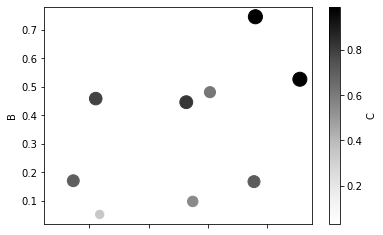

In [93]:
data.plot.scatter(x= 'A',y= 'B', #scatterplot x and y
                  c= 'C', #color of data points
                  s= data['C']*200); #size of data points

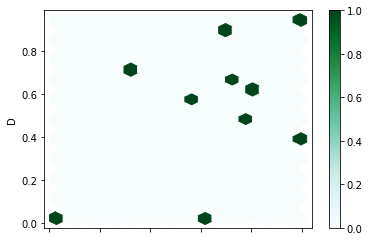

In [94]:
data.plot.hexbin(x= 'C',y= 'D', #hexbin x and y
                 gridsize= 18); #hexagon dimensions

Note: Although color for **.plot.scatter()** was greyscale by default, one could have passed in a color map argument. All plots have a figsize=(x,y) argument as well to allow for control of the size of the outputted figure. Putting a semicolon (;) after each plotting line allows for multiple outputs in Jupyter Notebook.

One example of pandas doing heavy lifting in plotting for you is with subplots. By enabling subplots=True, pandas automatically create subplots based on the columns. For instance, consider the following generated DataFrame, which has two columns (X and Y), as well as five rows (indices A, B, C, D, E) — this pie chart will generate two pie charts, each with five sections.

In [89]:
data = pd.DataFrame(np.random.rand(5, 2), index = list('ABCDE'), columns = list('XY'))

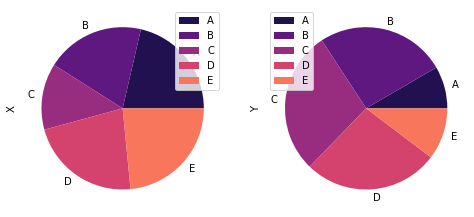

In [90]:
data.plot.pie(subplots = True, figsize = (8, 4));

Normally, you would need to create two subplots by hand. Especially in a case where you would want to generate several subplots, one can imagine how it would be helpful to directly use pandas plotting methods.

Other parameters for the pie chart include **labels=['label1','label2']**, which adds custom labels to the slices; **colors=[‘red’,’green’]**, which specifies the color of each slice; **autopct=’%.2f’**, which determines the percent labels and the degree of truncation of decimals; and **fontsize=20**, which determines the size of the labels.

***As another example of the convenience of subplots in direct-pandas plotting, consider plotting line data (the default when using .plot()):***

In [95]:
data = pd.DataFrame(np.random.rand(100, 4), columns = ['A', 'B', 'C', 'D'])

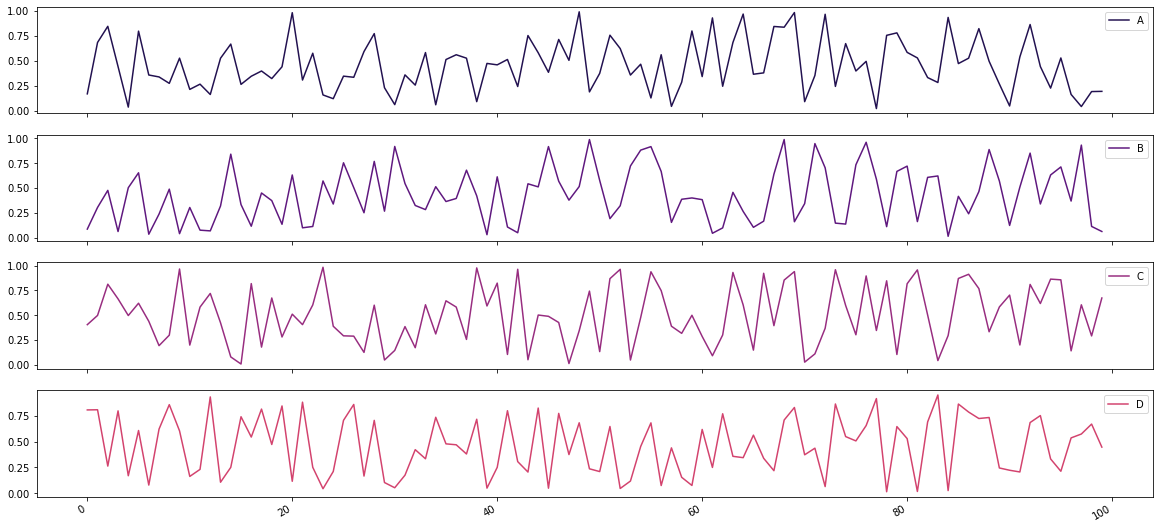

In [97]:
data.plot(subplots = True, figsize = (20, 10));

Consider the result when adding a parameter **layout=(2, 2)** in the line of code that plots the visualization (after subplots=True): pandas automatically formats the subplots in a format according to the layout. The dimensions of each subplot are determined by the figsize argument, which specifies the size of the “master-plot” that encompasses all subplots.

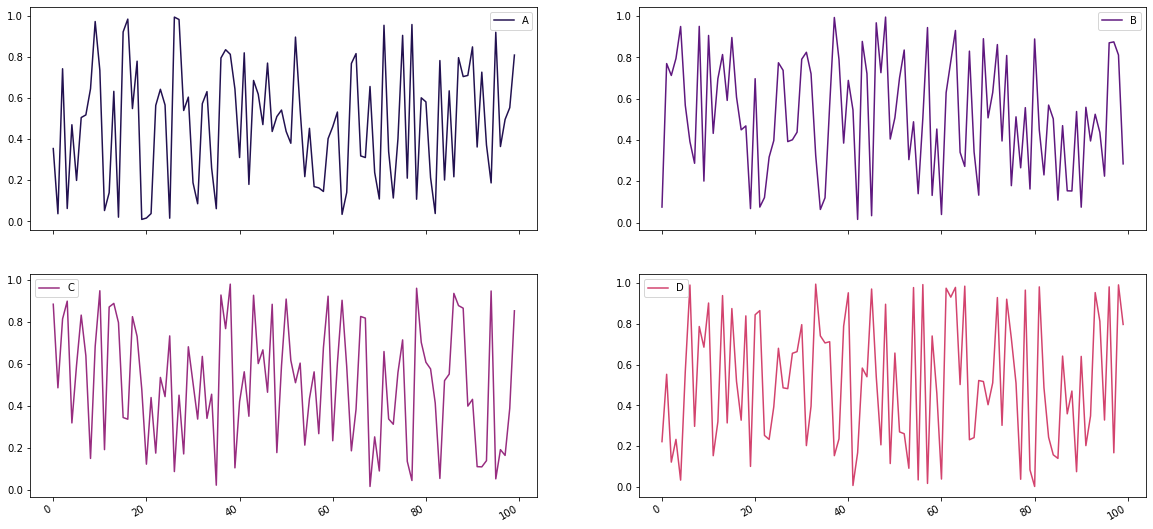

In [100]:
data.plot(subplots = True, figsize = (20, 10), layout = (2, 2));

Given the extensive amount of parameters pandas offers in direct plotting — from error bars to offering table displays, there is almost no loss in freedom in terms of what visualizations you can create. From offering simple plot variants to easy subplot management, pandas has so much to offer plotting.

The next time you’re producing a simple data analysis plot, try out pandas! You may be shocked how much more efficiently you are able to visualize.